# Analisis dan Eksperimen Sistem Informasi Retrieval (IR) - UTS STKI

Notebook ini digunakan untuk mendokumentasikan proses dan hasil eksperimen pada sistem IR yang dibangun, termasuk visualisasi hasil evaluasi yang menarik.

## 1. Pengenalan

Sistem IR ini menggunakan dua model utama:

- **Boolean Retrieval**: Model berbasis logika boolean (AND/OR/NOT) untuk query tepat.
- **Vector Space Model (VSM)**: Model berbasis TF-IDF dan Cosine Similarity untuk query fleksibel.

Data yang digunakan adalah teks tentang berbagai penyakit dan gejala dalam bahasa Indonesia.

## 2. Setup dan Import

Import library yang diperlukan untuk analisis dan visualisasi.

In [1]:
# Setup path untuk import
import sys
import os
sys.path.append('..')

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from src.evaluation import evaluate_model
from src.boolean_retrieval import BooleanRetrieval
from src.vsm import VectorSpaceModel

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8')

print("Setup selesai!")

Setup selesai!


## 3. Preprocessing Data

Langkah-langkah preprocessing:

- Lowercase
- Remove punctuation
- Stemming menggunakan Sastrawi

Implementasi ada di `src/preprocess.py`.

In [2]:
import sys
print(sys.executable)

c:\Anaconda3\python.exe


In [3]:
!{sys.executable} -m pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Contoh penggunaan preprocessing
import sys
import os
sys.path.append('..')

from src.preprocess import preprocess_file

# Buat direktori processed jika belum ada
os.makedirs('data/processed', exist_ok=True)

# Preprocess semua file raw ke clean
raw_files = ['alergi', 'anemia', 'asma', 'batuk', 'demam', 'diabetes', 'diare', 'flu', 'hipertensi', 'insomnia', 'kolestrol', 'maag', 'obesitas', 'sakit_kepala', 'stres']

for file in raw_files:
    preprocess_file(f'../data/raw/{file}.txt', f'../data/processed/{file}_clean.txt')
    print(f"Preprocessing selesai untuk {file}.txt")

print("\nSemua file telah dipreprocess!")

Preprocessing selesai untuk alergi.txt
Preprocessing selesai untuk anemia.txt
Preprocessing selesai untuk asma.txt
Preprocessing selesai untuk batuk.txt
Preprocessing selesai untuk demam.txt
Preprocessing selesai untuk diabetes.txt
Preprocessing selesai untuk diare.txt
Preprocessing selesai untuk flu.txt
Preprocessing selesai untuk hipertensi.txt
Preprocessing selesai untuk insomnia.txt
Preprocessing selesai untuk kolestrol.txt
Preprocessing selesai untuk maag.txt
Preprocessing selesai untuk obesitas.txt
Preprocessing selesai untuk sakit_kepala.txt
Preprocessing selesai untuk stres.txt

Semua file telah dipreprocess!


## 4. Eksperimen dan Evaluasi Model

Mari kita lakukan eksperimen dengan beberapa query dan bandingkan performa Boolean Retrieval vs VSM.

In [5]:
import os

processed_dir = '../data/processed'
for file in os.listdir(processed_dir):
    path = os.path.join(processed_dir, file)
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read().strip()
    print(f"{file}: {len(text)} karakter")


alergi_clean.txt: 168 karakter
anemia_clean.txt: 182 karakter
asma_clean.txt: 154 karakter
batuk_clean.txt: 175 karakter
demam_clean.txt: 159 karakter
diabetes_clean.txt: 176 karakter
diare_clean.txt: 181 karakter
flu_clean.txt: 148 karakter
hipertensi_clean.txt: 147 karakter
insomnia_clean.txt: 164 karakter
kolestrol_clean.txt: 149 karakter
maag_clean.txt: 145 karakter
obesitas_clean.txt: 184 karakter
sakit_kepala_clean.txt: 193 karakter
stres_clean.txt: 187 karakter


In [6]:
# Inisialisasi model
br = BooleanRetrieval(data_dir='../data/processed')
vsm = VectorSpaceModel(data_dir='../data/processed')

# Definisi queries dan ground truth untuk eksperimen
queries = ['demam', 'batuk', 'sakit kepala', 'flu', 'asma', 'diabetes']
ground_truth = {
    'demam': ['demam', 'flu'],
    'batuk': ['batuk', 'asma'],
    'sakit kepala': ['sakit_kepala', 'hipertensi'],
    'flu': ['flu', 'demam'],
    'asma': ['asma', 'batuk'],
    'diabetes': ['diabetes']
}

# Evaluasi kedua model
br_results = evaluate_model(br, queries, ground_truth, k=10)
vsm_results = evaluate_model(vsm, queries, ground_truth, k=10)

print("Evaluasi Boolean Retrieval:")
for query, metrics in br_results.items():
    if query != 'MAP@k':
        print(f"{query}: Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}, AP={metrics['ap']:.3f}")
print(f"MAP@k: {br_results['MAP@k']:.3f}")

print("\nEvaluasi VSM:")
for query, metrics in vsm_results.items():
    if query != 'MAP@k':
        print(f"{query}: Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}, AP={metrics['ap']:.3f}")
print(f"MAP@k: {vsm_results['MAP@k']:.3f}")

Evaluasi Boolean Retrieval:
demam: Precision=0.200, Recall=1.000, AP=1.000
batuk: Precision=0.200, Recall=1.000, AP=1.000
sakit kepala: Precision=0.100, Recall=0.500, AP=0.250
flu: Precision=0.100, Recall=0.500, AP=0.500
asma: Precision=0.100, Recall=0.500, AP=0.500
diabetes: Precision=0.100, Recall=1.000, AP=1.000
MAP@k: 0.708

Evaluasi VSM:
demam: Precision=0.200, Recall=1.000, AP=1.000
batuk: Precision=0.200, Recall=1.000, AP=1.000
sakit kepala: Precision=0.100, Recall=0.500, AP=0.250
flu: Precision=0.100, Recall=0.500, AP=0.500
asma: Precision=0.100, Recall=0.500, AP=0.500
diabetes: Precision=0.100, Recall=1.000, AP=1.000
MAP@k: 0.708


## 5. Visualisasi Hasil Evaluasi

Mari kita visualisasikan hasil evaluasi untuk membandingkan performa kedua model dengan visualisasi yang menarik.

In [7]:
# Persiapkan data untuk visualisasi
data = []
for query in queries:
    data.append({
        'Query': query,
        'Model': 'Boolean Retrieval',
        'Precision': br_results[query]['precision'],
        'Recall': br_results[query]['recall'],
        'AP': br_results[query]['ap']
    })
    data.append({
        'Query': query,
        'Model': 'VSM',
        'Precision': vsm_results[query]['precision'],
        'Recall': vsm_results[query]['recall'],
        'AP': vsm_results[query]['ap']
    })

df = pd.DataFrame(data)
print("Data untuk visualisasi:")
df.head(10)

Data untuk visualisasi:


,Query,Model,Precision,Recall,AP
0,demam,Boolean Retrieval,0.2,1.0,1.00
1,demam,VSM,0.2,1.0,1.00
2,batuk,Boolean Retrieval,0.2,1.0,1.00
3,batuk,VSM,0.2,1.0,1.00
4,sakit kepala,Boolean Retrieval,0.1,0.5,0.25
5,sakit kepala,VSM,0.1,0.5,0.25
6,flu,Boolean Retrieval,0.1,0.5,0.50
7,flu,VSM,0.1,0.5,0.50
8,asma,Boolean Retrieval,0.1,0.5,0.50
9,asma,VSM,0.1,0.5,0.50


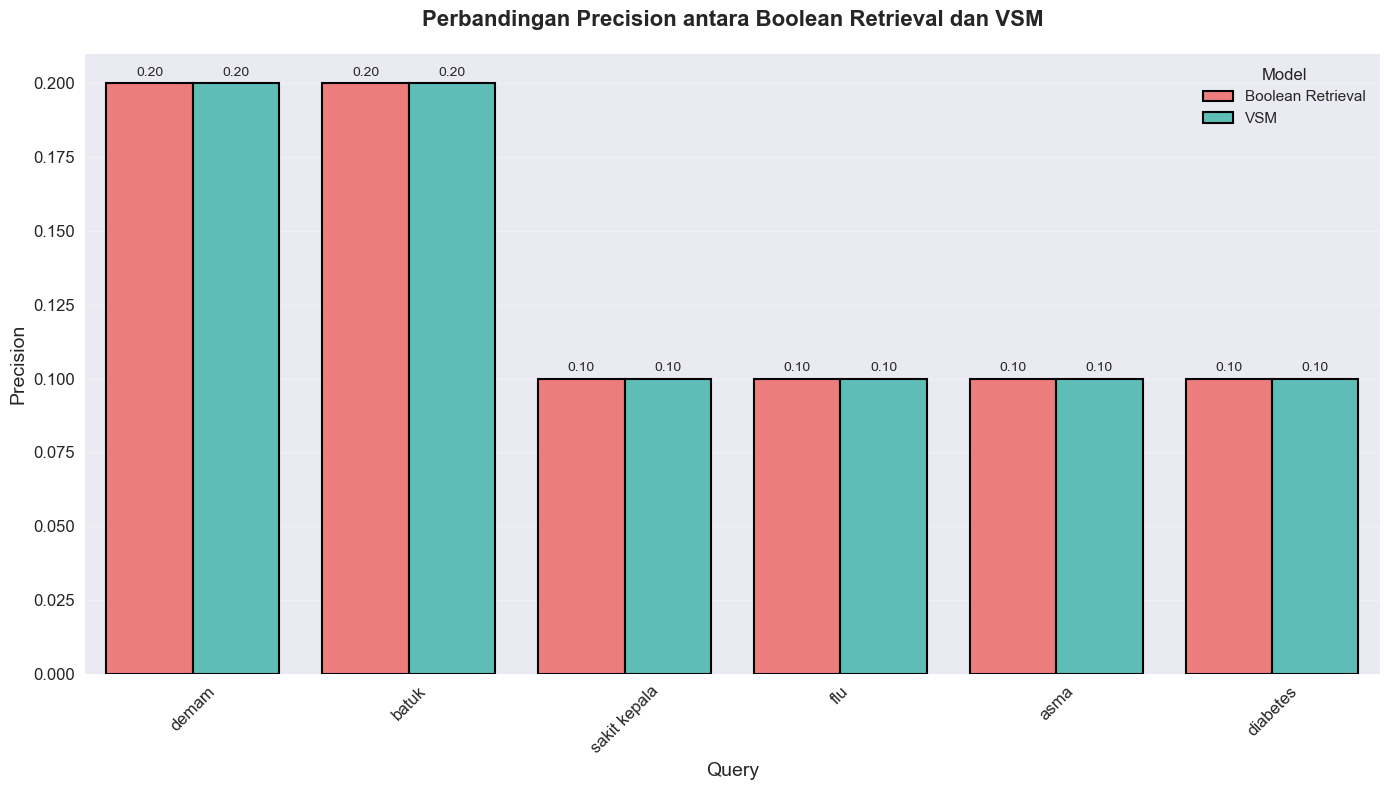

In [8]:
# Visualisasi Precision dengan style yang menarik
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df, x='Query', y='Precision', hue='Model', palette=['#FF6B6B', '#4ECDC4'], edgecolor='black', linewidth=1.5)
plt.title('Perbandingan Precision antara Boolean Retrieval dan VSM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Precision', fontsize=14)
plt.xlabel('Query', fontsize=14)
plt.legend(title='Model', title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

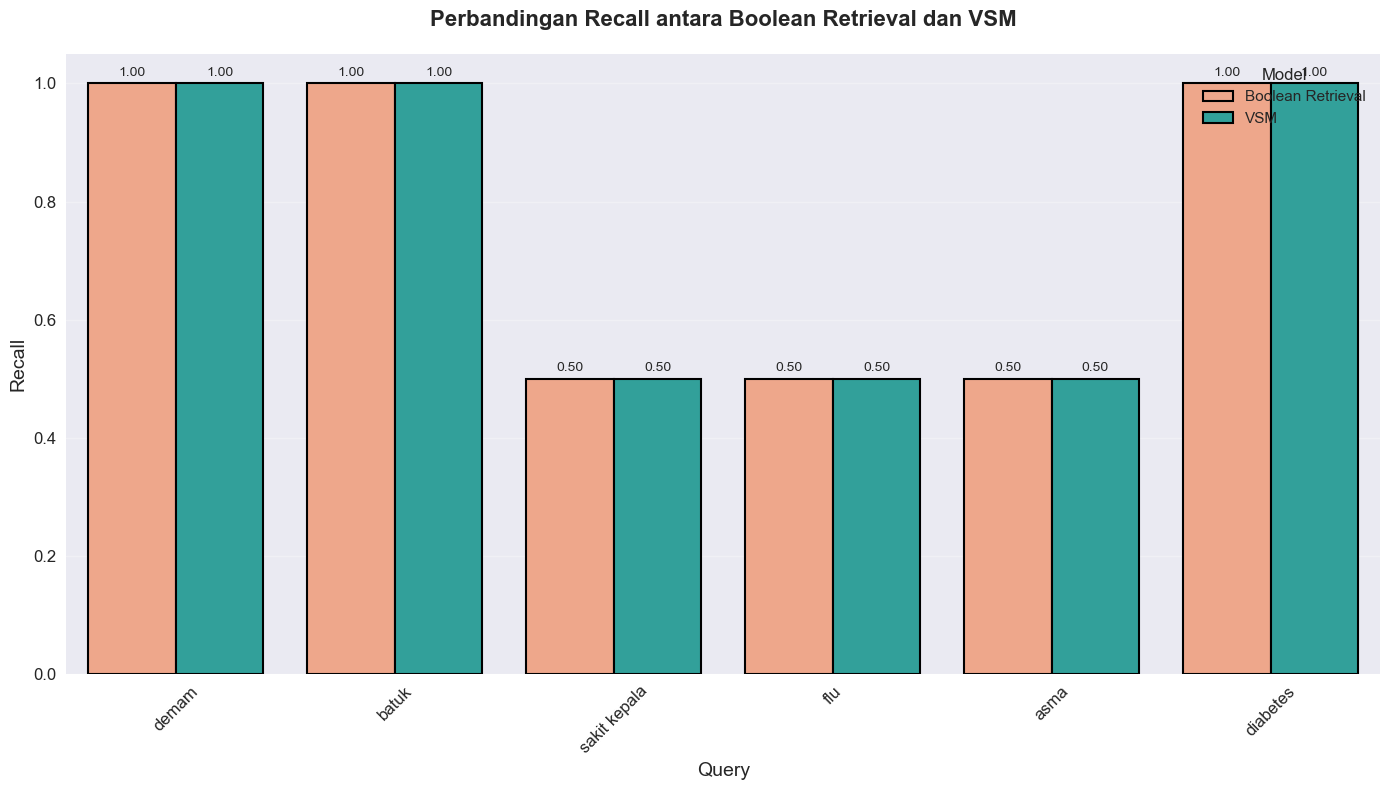

In [9]:
# Visualisasi Recall dengan style yang menarik
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df, x='Query', y='Recall', hue='Model', palette=['#FFA07A', '#20B2AA'], edgecolor='black', linewidth=1.5)
plt.title('Perbandingan Recall antara Boolean Retrieval dan VSM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Recall', fontsize=14)
plt.xlabel('Query', fontsize=14)
plt.legend(title='Model', title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

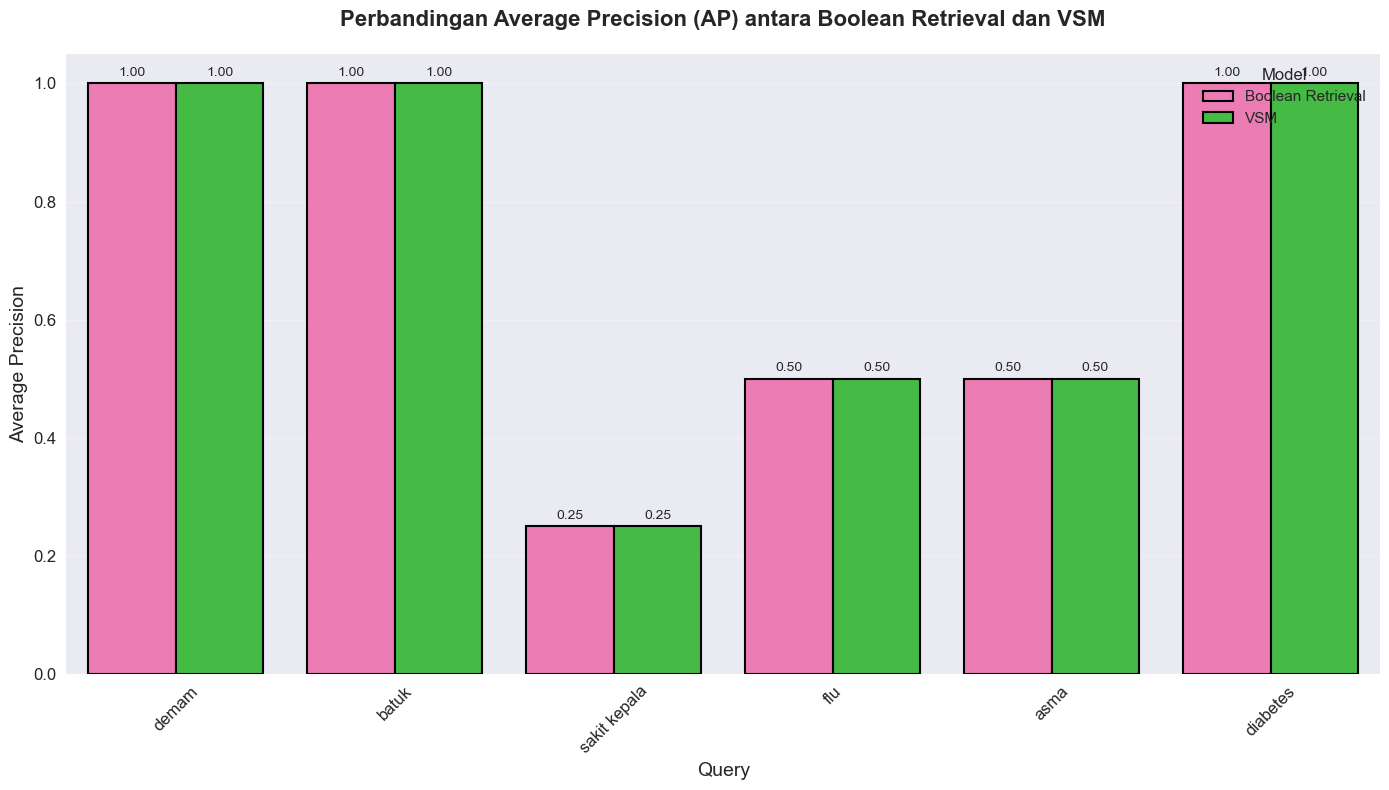

In [10]:
# Visualisasi Average Precision (AP) dengan style yang menarik
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df, x='Query', y='AP', hue='Model', palette=['#FF69B4', '#32CD32'], edgecolor='black', linewidth=1.5)
plt.title('Perbandingan Average Precision (AP) antara Boolean Retrieval dan VSM', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Precision', fontsize=14)
plt.xlabel('Query', fontsize=14)
plt.legend(title='Model', title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8248\57859919.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=map_data, x='Model', y='MAP@k', palette=['#FF6347', '#4682B4'], edgecolor='black', linewidth=1.5)


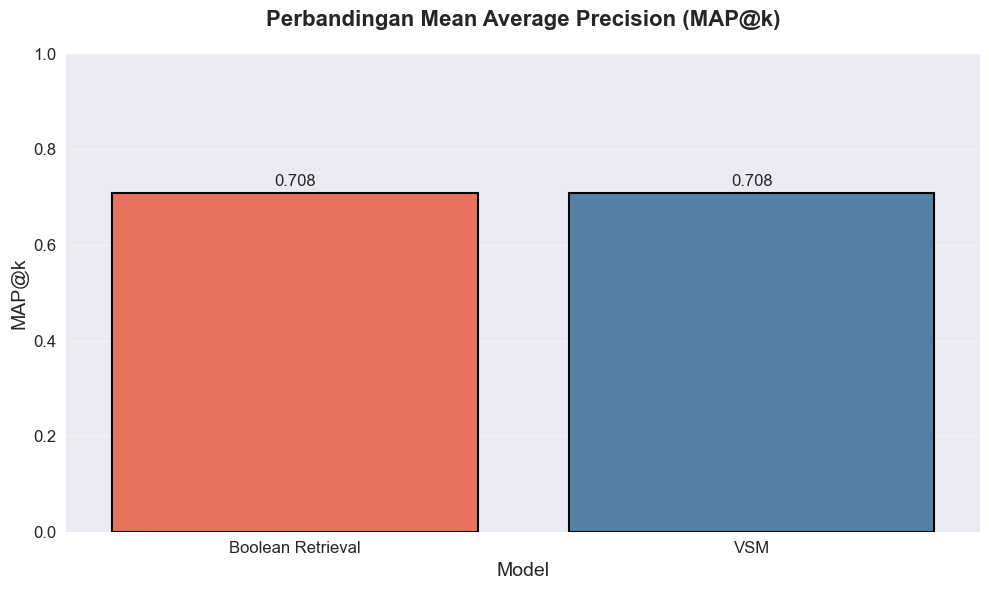

In [11]:
# Visualisasi MAP@k dengan style yang menarik
map_data = pd.DataFrame({
    'Model': ['Boolean Retrieval', 'VSM'],
    'MAP@k': [br_results['MAP@k'], vsm_results['MAP@k']]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=map_data, x='Model', y='MAP@k', palette=['#FF6347', '#4682B4'], edgecolor='black', linewidth=1.5)
plt.title('Perbandingan Mean Average Precision (MAP@k)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('MAP@k', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

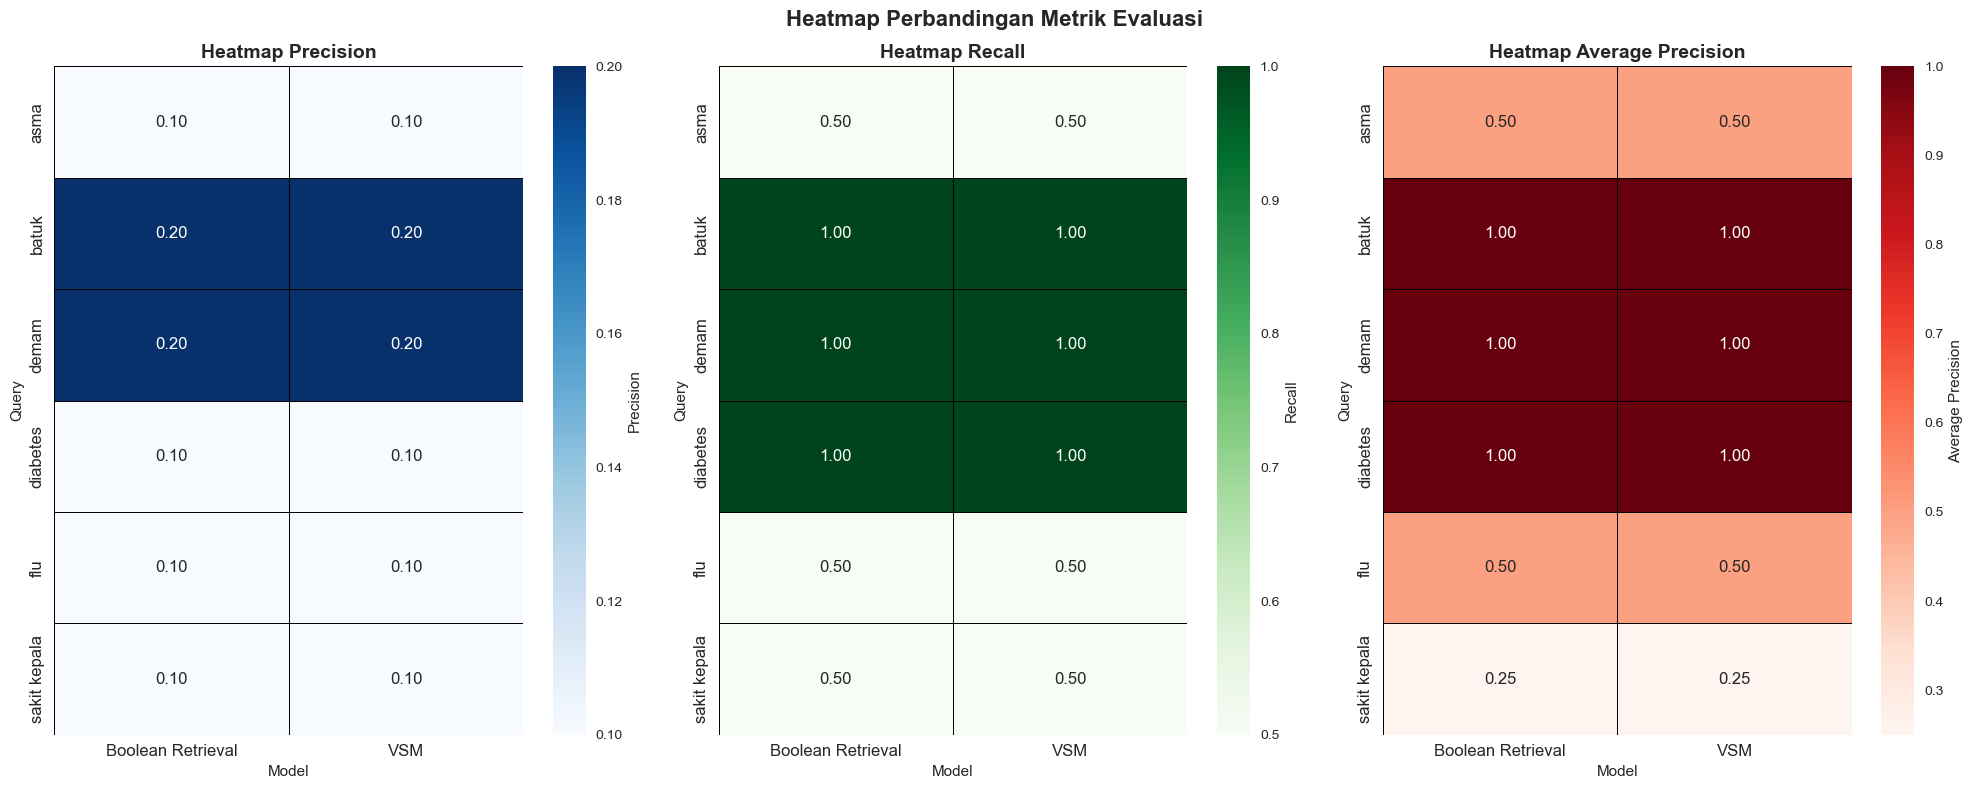

In [12]:
# Heatmap perbandingan metrik dengan style yang menarik
pivot_precision = df.pivot(index='Query', columns='Model', values='Precision')
pivot_recall = df.pivot(index='Query', columns='Model', values='Recall')
pivot_ap = df.pivot(index='Query', columns='Model', values='AP')

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.heatmap(pivot_precision, annot=True, cmap='Blues', ax=axes[0], cbar_kws={'label': 'Precision'}, 
            annot_kws={'size': 12}, fmt='.2f', linewidths=0.5, linecolor='black')
axes[0].set_title('Heatmap Precision', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=12)

sns.heatmap(pivot_recall, annot=True, cmap='Greens', ax=axes[1], cbar_kws={'label': 'Recall'}, 
            annot_kws={'size': 12}, fmt='.2f', linewidths=0.5, linecolor='black')
axes[1].set_title('Heatmap Recall', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=12)

sns.heatmap(pivot_ap, annot=True, cmap='Reds', ax=axes[2], cbar_kws={'label': 'Average Precision'}, 
            annot_kws={'size': 12}, fmt='.2f', linewidths=0.5, linecolor='black')
axes[2].set_title('Heatmap Average Precision', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Heatmap Perbandingan Metrik Evaluasi', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

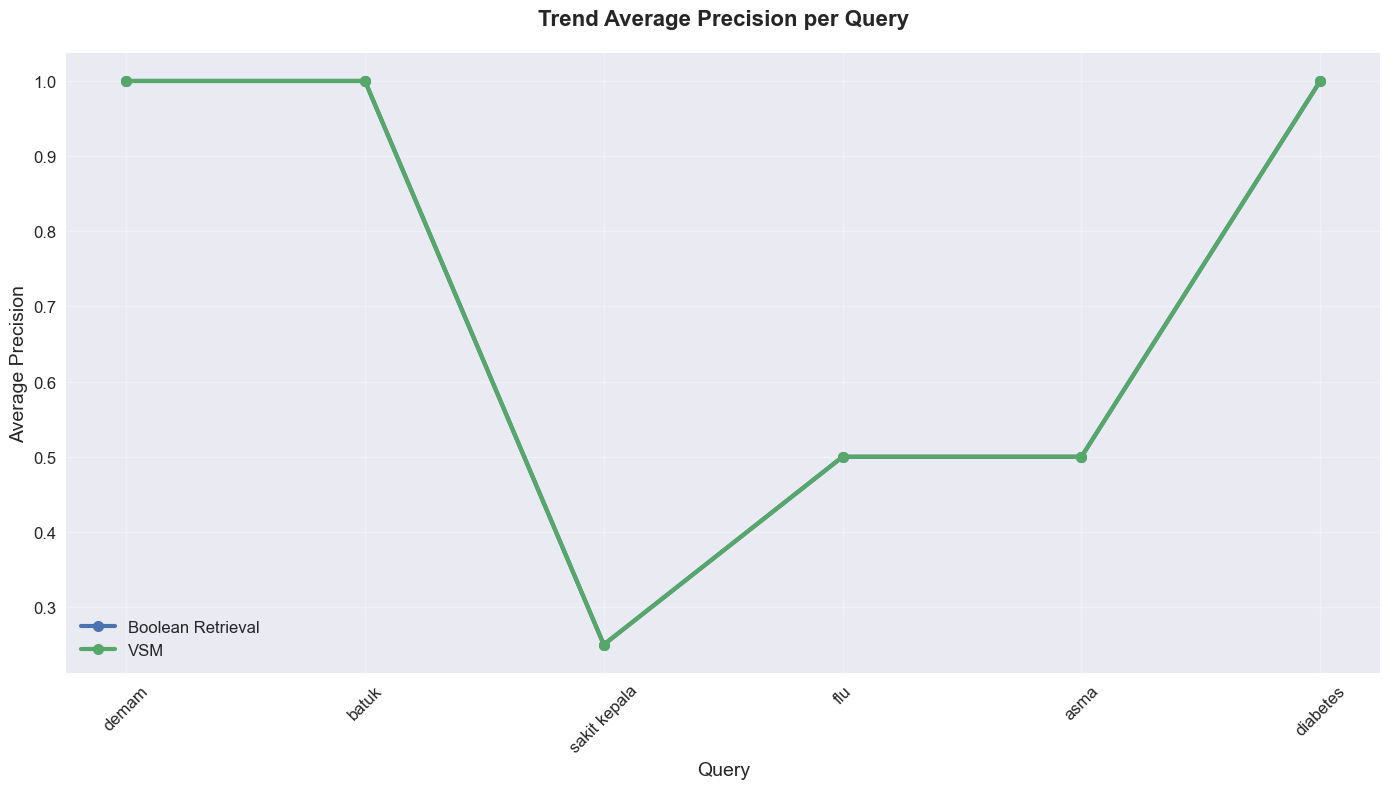

In [13]:
# Visualisasi tambahan: Line plot untuk trend AP per query
plt.figure(figsize=(14, 8))
for model in ['Boolean Retrieval', 'VSM']:
    subset = df[df['Model'] == model]
    plt.plot(subset['Query'], subset['AP'], marker='o', markersize=8, linewidth=3, label=model)
plt.title('Trend Average Precision per Query', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Precision', fontsize=14)
plt.xlabel('Query', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

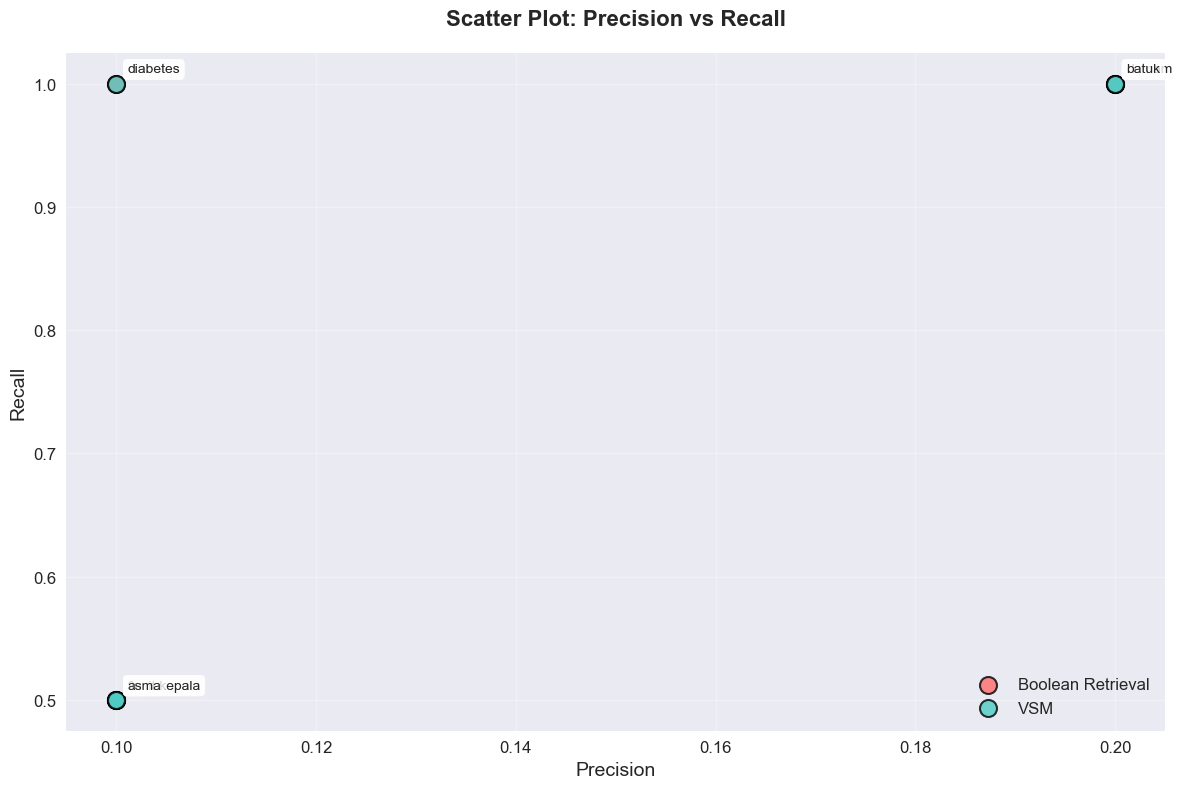

In [14]:
# Visualisasi tambahan: Scatter plot Precision vs Recall
plt.figure(figsize=(12, 8))
colors = {'Boolean Retrieval': '#FF6B6B', 'VSM': '#4ECDC4'}
for model in ['Boolean Retrieval', 'VSM']:
    subset = df[df['Model'] == model]
    plt.scatter(subset['Precision'], subset['Recall'], c=colors[model], s=150, alpha=0.8, edgecolors='black', linewidth=1.5, label=model)
    for i, row in subset.iterrows():
        plt.annotate(row['Query'], (row['Precision'], row['Recall']), xytext=(8, 8), textcoords='offset points', 
                     fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
plt.title('Scatter Plot: Precision vs Recall', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

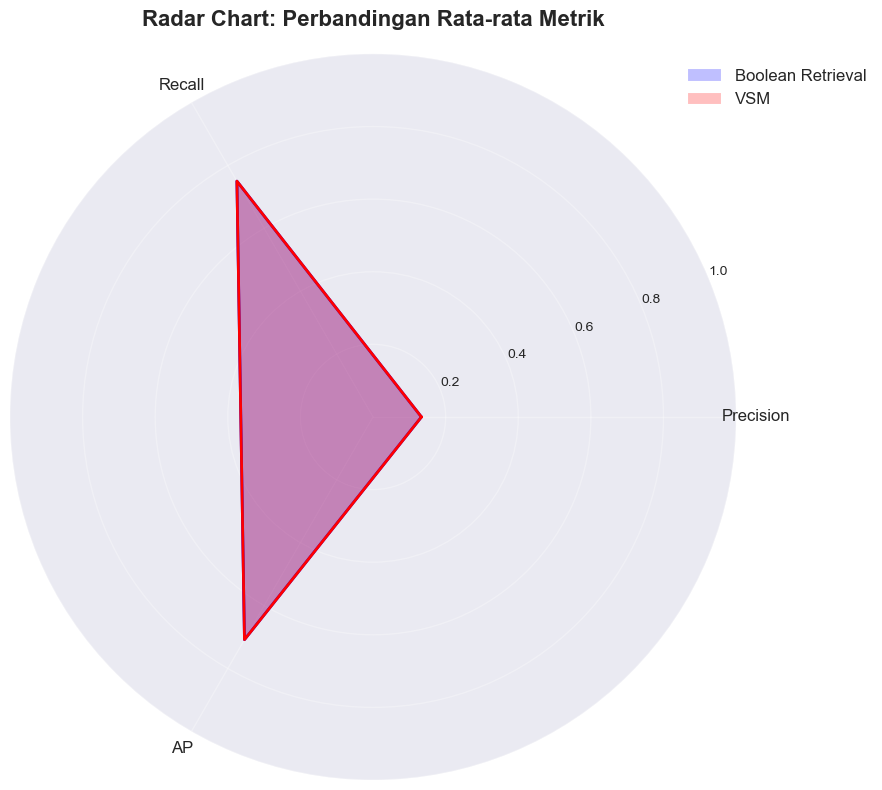

In [15]:
# Visualisasi tambahan: Radar chart untuk perbandingan metrik
import numpy as np

# Data untuk radar chart
categories = ['Precision', 'Recall', 'AP']
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))

# Data Boolean Retrieval
br_values = [df[df['Model'] == 'Boolean Retrieval']['Precision'].mean(),
             df[df['Model'] == 'Boolean Retrieval']['Recall'].mean(),
             df[df['Model'] == 'Boolean Retrieval']['AP'].mean()]

# Data VSM
vsm_values = [df[df['Model'] == 'VSM']['Precision'].mean(),
              df[df['Model'] == 'VSM']['Recall'].mean(),
              df[df['Model'] == 'VSM']['AP'].mean()]

# Sudut untuk setiap kategori
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Tutup lingkaran

# Plot Boolean Retrieval
br_values += br_values[:1]
ax.fill(angles, br_values, 'b', alpha=0.25, label='Boolean Retrieval')
ax.plot(angles, br_values, 'b-', linewidth=2)

# Plot VSM
vsm_values += vsm_values[:1]
ax.fill(angles, vsm_values, 'r', alpha=0.25, label='VSM')
ax.plot(angles, vsm_values, 'r-', linewidth=2)

# Label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 1)
ax.set_title('Radar Chart: Perbandingan Rata-rata Metrik', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Analisis Hasil

Berdasarkan visualisasi di atas, kita dapat menganalisis:

- **Precision**: Mengukur akurasi hasil yang relevan.
- **Recall**: Mengukur kemampuan menemukan semua dokumen relevan.
- **Average Precision (AP)**: Rata-rata precision pada setiap posisi dokumen relevan.
- **MAP@k**: Rata-rata AP untuk semua query.

Visualisasi ini membantu kita memahami kekuatan dan kelemahan masing-masing model untuk berbagai jenis query.

### Insights dari Visualisasi:
- Bar chart menunjukkan perbandingan langsung antara model untuk setiap query.
- Heatmap memberikan overview cepat tentang performa relatif.
- Line plot menunjukkan trend performa across queries.
- Scatter plot menggambarkan trade-off antara precision dan recall.
- Radar chart memberikan ringkasan rata-rata performa.

## 7. Kesimpulan

Ringkasan hasil eksperimen dan perbandingan model:

- **Boolean Retrieval** cocok untuk query yang tepat dan logis, memberikan hasil yang deterministik.
- **VSM** lebih fleksibel untuk query bahasa alami dan memberikan skor relevansi yang halus.

Pilih model berdasarkan kebutuhan aplikasi:
- Boolean untuk kontrol ketat dan query spesifik.
- VSM untuk fleksibilitas dan pengalaman pengguna yang lebih baik.

### Rekomendasi untuk Pengembangan Selanjutnya:
- Implementasi hybrid model yang menggabungkan kekuatan kedua pendekatan.
- Penambahan query expansion untuk meningkatkan recall.
- Optimisasi preprocessing untuk bahasa Indonesia.
- Evaluasi dengan dataset yang lebih besar dan beragam.